## Section 1. This sections objectives are:

1. Return and price data
2. Return and risk of individual stocks
3. Portfolio construction 
4. Portfolios risk and return
5. Investment opportunities space

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#If the two packages are not installed, use the following code to install
#You need only execute this code once ever

import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas


### To load the data, you can import from the *.csv file

In [71]:
#Put the stock_price.csv under the same folder as this Jupyter notebook file

df= pd.read_csv('stock_price.csv')
print(df)

                          Date        AAPL         GE        MSFT
0    2022-01-03 00:00:00-05:00  180.959747  74.806664  331.642456
1    2022-01-04 00:00:00-05:00  178.663086  77.239601  325.955750
2    2022-01-05 00:00:00-05:00  173.910645  77.239601  313.443024
3    2022-01-06 00:00:00-05:00  171.007523  77.690422  310.966217
4    2022-01-07 00:00:00-05:00  171.176514  78.817497  311.124725
..                         ...         ...        ...         ...
246  2022-12-23 00:00:00-05:00  131.860001  63.848557  238.729996
247  2022-12-27 00:00:00-05:00  130.029999  64.668228  236.960007
248  2022-12-28 00:00:00-05:00  126.040001  63.989071  234.529999
249  2022-12-29 00:00:00-05:00  129.610001  65.378609  241.009995
250  2022-12-30 00:00:00-05:00  129.929993  65.409836  239.820007

[251 rows x 4 columns]


### <span style="color:white"> Alternatively, you can use the following package to download daily stock price from yahoo finance directly:</span>

#Install yfinance package
!{sys.executable} -m pip install yfinance

In [73]:
#import the yfinance package

import yfinance as yf

df = yf.download("AAPL GE MSFT", start="2022-01-03", end="2022-12-31")
print(df)


[*********************100%%**********************]  3 of 3 completed


Price        Adj Close                              Close             \
Ticker            AAPL         GE        MSFT        AAPL         GE   
Date                                                                   
2022-01-03  179.724548  74.581627  328.120911  182.009995  75.128807   
2022-01-04  177.443558  77.007233  322.494537  179.699997  77.572212   
2022-01-05  172.723587  77.007233  310.114685  174.919998  77.572212   
2022-01-06  169.840256  77.456696  307.664215  172.000000  78.024979   
2022-01-07  170.008118  78.580383  307.821014  172.169998  79.156906   
...                ...        ...         ...         ...        ...   
2022-12-23  130.959961  63.656475  236.195007  131.860001  63.848557   
2022-12-27  129.142441  64.473679  234.443817  130.029999  64.668228   
2022-12-28  125.179680  63.796570  232.039627  126.040001  63.989071   
2022-12-29  128.725311  65.181931  238.450806  129.610001  65.378609   
2022-12-30  129.043121  65.213058  237.273453  129.929993  65.40

In [74]:
#keep only adjusted close price

df = df.iloc[: , :3]
df.columns = ['APPLE', 'GELECT', 'MSOFT']
print(df)

                 APPLE     GELECT       MSOFT
Date                                         
2022-01-03  179.724548  74.581627  328.120911
2022-01-04  177.443558  77.007233  322.494537
2022-01-05  172.723587  77.007233  310.114685
2022-01-06  169.840256  77.456696  307.664215
2022-01-07  170.008118  78.580383  307.821014
...                ...        ...         ...
2022-12-23  130.959961  63.656475  236.195007
2022-12-27  129.142441  64.473679  234.443817
2022-12-28  125.179680  63.796570  232.039627
2022-12-29  128.725311  65.181931  238.450806
2022-12-30  129.043121  65.213058  237.273453

[251 rows x 3 columns]


# I: compute returns

In this step, we pick some stocks that we want to have in our portfolio, compute their returns from prices and so afterwards we can compute Expected return, Risk and Covariances between assets.

Let’s say we want to invest in three stocks in the U.S. market: Apple Inc. (AAPL), General Electric Company (GE), Microsoft Corporation (MSFT). From the preparation above, we have daily adjusted closing prices from Jan 03, 2022 to Dec 31, 2022 of the three stocks downloaded from finance.yahoo.com.

Compute returns using the following formula:

$$R_t = \frac{AdjP_t-AdjP_{t-1}}{AdjP_{t-1}}$$

(Adjusted closing price is the price of the stock taking into account dividends, stock splits and new stock offerings. We should use adjusted closing price rather than closing price to compute returns.)

In [75]:
df.pct_change()

,APPLE,GELECT,MSOFT
Date,,,
2022-01-03,NaN,NaN,NaN
2022-01-04,-0.012692,0.032523,-0.017147
2022-01-05,-0.026600,0.000000,-0.038388
2022-01-06,-0.016693,0.005837,-0.007902
2022-01-07,0.000988,0.014507,0.000510
...,...,...,...
2022-12-23,-0.002798,0.000245,0.002267
2022-12-27,-0.013878,0.012838,-0.007414
2022-12-28,-0.030685,-0.010502,-0.010255


                 APPLE     GELECT       MSOFT
Date                                         
2022-01-03  179.724548  74.581627  328.120911
2022-01-04  177.443558  77.007233  322.494537
2022-01-05  172.723587  77.007233  310.114685
2022-01-06  169.840256  77.456696  307.664215
2022-01-07  170.008118  78.580383  307.821014
...                ...        ...         ...
2022-12-23  130.959961  63.656475  236.195007
2022-12-27  129.142441  64.473679  234.443817
2022-12-28  125.179680  63.796570  232.039627
2022-12-29  128.725311  65.181931  238.450806
2022-12-30  129.043121  65.213058  237.273453

[251 rows x 3 columns]


<Axes: xlabel='Date'>

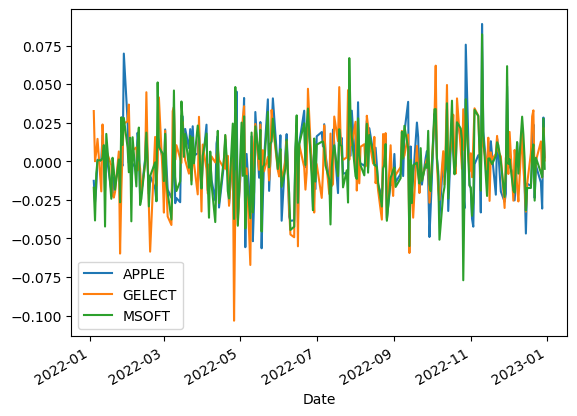

In [14]:
print(df)
#Plot the shares
daily_ret = df.pct_change()
daily_ret.plot()

# II: Expected returns, standard deviation, covariances

estimate expected returns and standard deviation for these stocks. To quantify portfolio risk, we also need covariances between the stocks. Note, we are measruing risk (volatility) by standard deviation.

1. The expected return of each stock is estimated as the sample mean (average) of stock returns:
$$ \bar R = \sum_{t=1}^{T} \frac{R_{t}}{T} $$ 

2. The variance of each stock is estimated as:
$$ \sigma^{2} = \sum_{t=1}^{T}\frac{R_{i} - \bar R}{T-1} $$

3. The standard deviation of each stock is estimated by taking square root of the variances. 
$$ \sigma = \sqrt{\sigma^{2}} $$ 

4. make the variance-covariance matrix of the three stocks. variance-covariance matrix contains variances and covariances, basically what we need to compute portfolio variance. 

<table>
    <tr>
        <td>
    \begin{array}{cccc}
    \hline \hline
    \textbf{} & \textbf{APPLE} & \textbf{GELECT} & \textbf{MSOFT} \\
    \hline
    \textbf{APPLE} & \textbf{$ \sigma^{2}_{APPLE} $} & \textbf{$ \sigma_{APPLE, GELECT} $} & \textbf{$ \sigma_{APPLE, MSOFT} $} \\
    \textbf{GELECT} & \textbf{$ \sigma_{GELECT, APPLE} $} & \textbf{$ \sigma^{2}_{GELECT} $} & \textbf{$ \sigma_{GELECT, MSOFT} $} \\
    \textbf{MSOFT} & \textbf{$ \sigma_{MSOFT, APPLE} $} & \textbf{$ \sigma_{MSOFT, GELECT} $} & \textbf{$ \sigma^{2}_{MSOFT} $} \\
    \hline \hline
    \end{array}
        </td>
    </tr>
</table>
    
We have already estimated the variances and we use the following formula to estimated the covariances:
$$ cov(R^{1},R^{2}) = \sum_{t=1}^{T}\frac{(R^{1}_{t} - \bar R_{1})(R^{2}_{t} - \bar R^{2})}{T-1} $$


In [15]:
daily_ret.mean() * 252

APPLE    -0.270522
GELECT   -0.073888
MSOFT    -0.264223
dtype: float64

In [16]:
daily_ret.var()*252

APPLE     0.127250
GELECT    0.122097
MSOFT     0.125191
dtype: float64

In [24]:
daily_ret.std()*(252**0.5)

APPLE     0.356721
GELECT    0.349424
MSOFT     0.353823
dtype: float64

In [18]:
cov_mat = daily_ret.cov()*252
print(cov_mat)

           APPLE    GELECT     MSOFT
APPLE   0.127250  0.068938  0.104116
GELECT  0.068938  0.122097  0.059959
MSOFT   0.104116  0.059959  0.125191


In [25]:
# Calculate summary statistics
sum_stats = {
    'Mean': daily_ret.mean() * 252,
    'Var': daily_ret.var() * 252,
    'Std': daily_ret.std() * (252 ** 0.5)    
}

# Create a DataFrame from the dictionary
sum_stats = pd.DataFrame(sum_stats)

# Print the DataFrame
print(sum_stats)

            Mean       Var       Std
APPLE  -0.270522  0.127250  0.356721
GELECT -0.073888  0.122097  0.349424
MSOFT  -0.264223  0.125191  0.353823


In [26]:
cov_mat = daily_ret.cov()*252
print(cov_mat)

           APPLE    GELECT     MSOFT
APPLE   0.127250  0.068938  0.104116
GELECT  0.068938  0.122097  0.059959
MSOFT   0.104116  0.059959  0.125191


# III: risk and return of a portfolio

In this step we calculate the risk and return of a portfolio. In our portfolio, the weights of AAPL, GE, MSFT are 0.2, 0.5 and 0.3, respectively.

1. portfolio consists of three stocks. The portfolio return is computed as follows:<br>
 $$ E(R_{P}) = w_{1}E(R_{1}) + w_{2}E(R_{2})+ w_{3}E(R_{3})  $$ <br>
Lets define vector $ \mathbf{w}= [w_{1}, w_{2}, w_{3}] $ and the expected return vector $ E(\mathbf{R}) = [E(R_{1}), E(R_{2}), E(R_{3})] $, the portfolio return is:
 $$ E(R_{P}) = \mathbf{w}E(\mathbf{R})^{'} $$ <br>

2. Let's define $ \Sigma $ as the covariance matrix of the three stocks and $ \mathbf{w}$ is the vector of weights (the portion of wealth invested in each stock). The portfolio variance is:
$$ \sigma^{2}_{P} = \mathbf{w}\Sigma \mathbf{w}^{'} $$ 
It looks like:
$$ \sigma^{2}_{P} = \begin{bmatrix}
w_{1} & w_{2} & w_{3}
\end{bmatrix} \begin{bmatrix}
\sigma^{2}_{1} & \sigma_{12} & \sigma_{13}\\
\sigma_{21} & \sigma^{2}_{2} & \sigma_{23}\\
\sigma_{31} & \sigma_{32} & \sigma^{2}_{3}\\
\end{bmatrix} \begin{bmatrix}
w_{1} \\
w_{2} \\
w_{3}
\end{bmatrix} $$
$$= w_{1}^{2}\sigma_{1}^{2} + w_{2}^{2}\sigma_{2}^{2} + w_{3}^{2}\sigma_{3}^{2} + 2w_{1}w_{2}\sigma_{12} + 2w_{2}w_{3}\sigma_{23} + 2w_{1}w_{3}\sigma_{13}  $$

3. Now, calculate the portfolio return here. We consider a portfolio with this vector of weights: $w_{1} = 0.2$, $w_{2} = 0.5$, and $w_{1} = 0.3$. Compute the expected return on this portfolio using the vector of expected returns for each stock and the vector of weights invested in each stock.

4. Compute the portfolio variance considering the above formulation.

In [27]:
sum_stats.Mean

APPLE    -0.270522
GELECT   -0.073888
MSOFT    -0.264223
Name: Mean, dtype: float64

In [28]:
weight = [0.2, 0.5, 0.3] 

#portfolio mean
port_ret = weight@sum_stats.Mean
print(port_ret)

-0.17031548481497777


In [29]:
weight@cov_mat@weight

0.0911504624221611

In [30]:
(weight@cov_mat@weight)**0.5

0.3019113486143923

In [31]:
port_stats = np.array([weight@(sum_stats.Mean),
            weight@cov_mat@weight,
            (weight@cov_mat@weight)**0.5])

print(port_stats)

[-0.17031548  0.09115046  0.30191135]


# IV: Risk-Return space

Now, let's start making a large set of portfolios and see how the risk-return combination looks like in risk-return space. To implement this step, we are going to build a large set of portfolios and therefore, we need to generate a large set of weights. Weights invested in the portfolio can be anything basically. We should only make sure that we don't invest more than we have. Therefore, we should make sure $ \mathbf{1w^{'}}=1 $. Weights can also be constrained to be positive ($ w_{i}>0 $) when we want to apply no short-selling constraint. 

1. You already have the expected returns and risk for the stocks. Let's generate a large set of stocks' weights with constraint $ \mathbf{1w^{'}}=1 $

2. Let's keep the weight values, for simplicity, between -1 and 1. As you already know the negative values represent the short-selling cases and the positive values represent the buying cases. 

3. In order to generate a random value between 0 and 1 in Python, use the function **np.random.rand()**. Use this function to get $ w_{1} $ and $ w_{2} $. For $ w_{3} $ use $ 1-w_{1}-w_{2} $. This will make sure that the summation of portfolio weights is 1 and thereby, the constraint $ \mathbf{1w^{'}}=1 $ holds. Generate a sample of 2000 rows of portfolio weights. (also think about do we always have $w_{3} \in (-1,1)$ ?) 

4. Next, compute portfolio expected return and variance for each row of weights (or vector of weights).

5. Compute the standard deviation using the function **np.std()**.

6. Now, you have different possible portfolios, and you have the portfolio expected returns and risk (in our case, it is measured by standard deviation). 

7. Use plot() function to create a scatter chart of risk and return. Consider the Standard Deviation of the portfolios as the X-axis and the Expected Return of the portfolios as the Y-axis. 


In [32]:
2*np.random.rand(1,1)-1

array([[0.99585914]])

In [33]:
weight = 2*np.random.rand(100000, 2) -1
weight= pd.DataFrame(weight)
weight

,0,1
0,-0.368722,-0.429321
1,-0.732104,0.851022
2,0.974212,-0.110132
3,0.767717,-0.459951
4,-0.564038,-0.534697
...,...,...
99995,-0.582019,0.731761
99996,0.939060,0.829615
99997,0.751232,-0.627061
99998,-0.316445,-0.912219


In [34]:
weight.columns = ['weight1', 'weight2']
weight['weight3'] = 1 - weight['weight1'] - weight['weight2']
weight = weight.query('weight3 >= -1 & weight3 <= 1')
print(weight)

        weight1   weight2   weight3
1     -0.732104  0.851022  0.881082
2      0.974212 -0.110132  0.135920
3      0.767717 -0.459951  0.692233
10     0.841608 -0.036948  0.195340
13     0.654689  0.745107 -0.399797
...         ...       ...       ...
99994  0.175861  0.621779  0.202361
99995 -0.582019  0.731761  0.850258
99996  0.939060  0.829615 -0.768675
99997  0.751232 -0.627061  0.875829
99999  0.288582  0.080789  0.630629

[49882 rows x 3 columns]


In [39]:
weight = np.array(weight)
weight@sum_stats.Mean

array([-0.09763239, -0.29132163, -0.35660355, ..., -0.11223376,
       -0.38830659, -0.25066393])

## Section 2. The Objective of this Section is to cover the following:

1. Minimum variance portfolio
2. Efficient frontier with short-selling constraint and no risk-free lending and borrowing
3. Efficient frontier without short-selling constraint and no risk-free lending and borrowing
4. Efficient frontier without short-selling constraint and also with risk-free lending and borrowing

In [40]:
#use yf.download to get the AAPL, GE, and MSFT stock price from 2022-01-03 to 2022-12-31
df = yf.download("AAPL GE MSFT", start="2022-01-03", end="2022-12-31")

[*********************100%%**********************]  3 of 3 completed


In [37]:
print (df)

Price        Adj Close                              Close             \
Ticker            AAPL         GE        MSFT        AAPL         GE   
Date                                                                   
2022-01-03  179.724548  74.581627  328.120911  182.009995  75.128807   
2022-01-04  177.443558  77.007233  322.494537  179.699997  77.572212   
2022-01-05  172.723587  77.007233  310.114685  174.919998  77.572212   
2022-01-06  169.840256  77.456696  307.664215  172.000000  78.024979   
2022-01-07  170.008118  78.580383  307.821014  172.169998  79.156906   
...                ...        ...         ...         ...        ...   
2022-12-23  130.959961  63.656475  236.195007  131.860001  63.848557   
2022-12-27  129.142441  64.473679  234.443817  130.029999  64.668228   
2022-12-28  125.179680  63.796570  232.039627  126.040001  63.989071   
2022-12-29  128.725311  65.181931  238.450806  129.610001  65.378609   
2022-12-30  129.043121  65.213058  237.273453  129.929993  65.40

In [41]:
#keep only adj close price
df = df.iloc[: , :3]
df.columns = ['APPLE', 'GELECT', 'MSOFT']  #rename the column names
daily_ret = df[['APPLE', 'GELECT', 'MSOFT']].pct_change() #construct daily percentage returns

print(daily_ret)

               APPLE    GELECT     MSOFT
Date                                    
2022-01-03       NaN       NaN       NaN
2022-01-04 -0.012692  0.032523 -0.017147
2022-01-05 -0.026600  0.000000 -0.038388
2022-01-06 -0.016693  0.005837 -0.007902
2022-01-07  0.000988  0.014507  0.000510
...              ...       ...       ...
2022-12-23 -0.002798  0.000245  0.002267
2022-12-27 -0.013878  0.012838 -0.007414
2022-12-28 -0.030685 -0.010502 -0.010255
2022-12-29  0.028324  0.021715  0.027630
2022-12-30  0.002469  0.000478 -0.004938

[251 rows x 3 columns]


In [42]:
# Summary statistics for calculations later

sum_stats = {'Mean':daily_ret.mean()*252,
        'Var': daily_ret.var()*252,
        'Std': daily_ret.std()*(252**0.5)}

sum_stats = pd.DataFrame(sum_stats)
print(sum_stats)

            Mean       Var       Std
APPLE  -0.270522  0.127250  0.356721
GELECT -0.073888  0.122097  0.349424
MSOFT  -0.264223  0.125191  0.353823


In [43]:

cov_mat = daily_ret.cov()*252
print(cov_mat)

           APPLE    GELECT     MSOFT
APPLE   0.127250  0.068938  0.104116
GELECT  0.068938  0.122097  0.059959
MSOFT   0.104116  0.059959  0.125191


# Prerequisite Programming Concepts:

1. In order to find the weights of each shares in portfolio we solve optimization problems. The SciPy library is widely used in optimizaiton problem solving in Python. Install the library if you do not have it in your Python environment.
2. Try to solve this optimization problem:

$$ \min_{x,y,z} f(x,y,z) = \frac{1}{xyz} $$ 
$$ s.t. \mathbf{x+y+z}=1 $$
$$ \mathbf{x,y,z}>0 $$

In [44]:
import sys
!{sys.executable} -m pip install --upgrade SciPy
from scipy.optimize import minimize

In [45]:
#Now find the minimize value of f(x,y,z) = 1/xyz,
#With constraint that: x,y,z > 0, and x+y+z = 1

#e = 1e-10 #we create a very small positive real number here

#define the objective function: f(x,y,z) = 1/xyz
f = lambda x: 1/(x[0]*x[1]*x[2]) 

#define the constraints:
cons = ({'type':'eq','fun':lambda x:x[0] + x[1] + x[2] - 1}, #constraint：x+y+z=1
        {'type':'ineq','fun':lambda x:x[0] },                #constraint: x,y,z>0
        {'type':'ineq','fun':lambda x:x[1] },
        {'type':'ineq','fun':lambda x:x[2] })

x0 = np.array((0.33, 0.33, 0.33)) #set the initial value of x, y, z. just take one arbitrary forcast.

res = minimize(f, x0, constraints=cons) #the outcome is output to the variable res

print(res)
#print("minimazition value:",res.fun)
#print("solution:",res.x)

print('Result from optimazation:', res.x)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 27.00000000001841
       x: [ 3.333e-01  3.333e-01  3.333e-01]
     nit: 2
     jac: [-8.100e+01 -8.100e+01 -8.100e+01]
    nfev: 8
    njev: 2
Result from optimazation: [0.33333349 0.33333349 0.33333302]


In [46]:
print(res.x)

[0.33333349 0.33333349 0.33333302]


In [47]:
print(res.fun)

27.00000000001841


### We use loop to calculate the return and risk of randomly generated portfolios.

In [48]:
#Now generate many portfolios with random weights.

np.random.seed(42)
weight = 2*np.random.rand(10000, 2)-1
weight = pd.DataFrame(weight)

weight.columns = ['weight1', 'weight2']
weight['weight3'] = 1 - weight['weight1'] - weight['weight2']
weight = weight.query('weight3 >= -1 & weight3 <= 1')

#weight = np.array(weight)

#generate expected return and covariance
print(weight)

       weight1   weight2   weight3
0    -0.250920  0.901429  0.349491
1     0.463988  0.197317  0.338695
4     0.202230  0.416145  0.381625
6     0.664885 -0.575322  0.910436
12   -0.087860  0.570352  0.517508
...        ...       ...       ...
9992 -0.320860  0.791123  0.529736
9993 -0.148366  0.579531  0.568835
9994 -0.526713  0.897602  0.629111
9995  0.149156  0.518647  0.332196
9997  0.802077  0.754077 -0.556154

[5018 rows x 3 columns]


In [49]:
# Now calculate the portforlio return and risk for each set of weights accordingly:

asset_ret = np.array(sum_stats.Mean)
cov_mat = np.array(cov_mat)

port_ret = weight.dot(asset_ret)
port_risk = port_ret*0  #generate null values for portforlio risk

for i in range(len(port_risk)):
    port_weight = weight.iloc[i]
    port_risk.iloc[i] = port_weight@cov_mat@port_weight

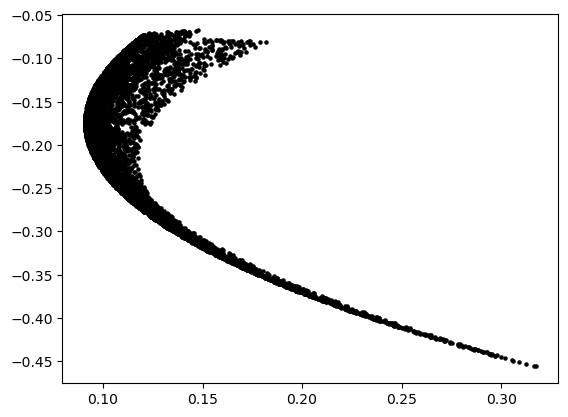

In [50]:
import matplotlib.pyplot as plt
plt.scatter(port_risk, port_ret, color='black', marker='o', s=5)

# The minimum-variance portfolio with no short-selling capability

start with investigating the minimum-variance portfolio with no short selling.

1. We have prepared the nariance-covariance matrix, that shows the covariances between three stocks, AAPL, GE and MSFT, in the variable ret_cov. Moreover, you also have the Expected return and Standard deviation of these individual stocks in the variable sum_stats.

2. Now, we want to find the minimum variance portfolio, So we want to solve the following problem:
$$ \min_{\mathbf{w}} \sigma^{2}_{P} = \mathbf{w\Sigma w'} $$ 
$$ s.t. \mathbf{w1^{'}}=1 $$
$$ \mathbf{w}>0 $$

3. You need to optimize (Do minimization in this case). There are many ways to solve optimazition problems with constraints in Python. Let's try the optimize solver provided in SciPy library.

4. There is another way of finding minimum variance portfolio: You don't need to calculate the exact optimal portfolio weight in this case using Python. With the powerful tool of python dealing large dataset, we can just use the Monte Carlo Simulation: you can simply generate a large amount of random portfolio weights. Then the weight gives you the minimum variance is the one we want. 

5. Intuitively, the more random portfolio weights we generate, the more precise minimum variance portfolio weights we get. Here you can just generage 10,000 random portforlio weights.

6. Draw the scatter plot of all the portfolio weights simulation, and indicate the weights yields to the minimum variance portfolio. You can use *matplotlib* library for plotting.

Note: We are using the *portfolio return* and *expected portfolio return* interchangeably in this guide. 


In [58]:
#Generate a large amount of random weights for first three assets, i.e., 10000 weights
#normalize them so that sum of all weights equals one

#The random seed at the top of the code is making sure that 
#I get the same random numbers every time for reproducibility.
np.random.seed(42)

weight = np.random.rand(10000, 3)
weight = pd.DataFrame(weight)
weight.columns = ['weight1', 'weight2', 'weight3']
weight['weight_sum'] = weight['weight1'] + weight['weight2'] +weight['weight3']
weight['weight1'] = weight['weight1']/weight['weight_sum']
weight['weight2'] = weight['weight2']/weight['weight_sum']
weight['weight3'] = weight['weight3']/weight['weight_sum']
weight = weight.iloc[: , :3]

#now we have 10000 random generated portfolio weights
#let's calculate the portfolio returns
asset_ret = np.array(sum_stats.Mean)
port_ret = weight.dot(asset_ret)

#Then we calculate the portfolio risks (std)
cov_mat = np.array(cov_mat)
weight = np.array(weight)
port_std = (np.diag(weight@cov_mat@weight.T))


#Let's put the portfolio return, risk, and the weight of the assets in one dataframe: 
portfolios = pd.DataFrame({'ret':port_ret, 'risk':port_std})
weight = pd.DataFrame(weight)
weight.columns = ['weight1', 'weight2', 'weight3']
portfolios = portfolios.join(weight)

print(portfolios)

           ret      risk   weight1   weight2   weight3
0    -0.177411  0.090950  0.182059  0.462129  0.355812
1    -0.235755  0.104744  0.657381  0.171323  0.171296
2    -0.156382  0.091937  0.038078  0.567845  0.394077
3    -0.264542  0.114044  0.416865  0.012119  0.571017
4    -0.235549  0.105241  0.678655  0.173111  0.148234
...        ...       ...       ...       ...       ...
9995 -0.176935  0.094981  0.457985  0.473760  0.068255
9996 -0.225114  0.098180  0.390251  0.218388  0.391361
9997 -0.240393  0.108010  0.734031  0.149494  0.116475
9998 -0.173052  0.090924  0.136749  0.483532  0.379719
9999 -0.151806  0.092433  0.028702  0.591576  0.379722

[10000 rows x 5 columns]


In [59]:
from scipy.optimize import minimize
import numpy as np

# Assuming cov_mat and asset_ret are defined elsewhere
cov_mat = np.array(cov_mat)
asset_ret = np.array(asset_ret)

f = lambda x: x @ cov_mat @ x.T

x0 = np.array((0.33, 0.33, 0.33))  # Initial guess for portfolio weights

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights constraint
        {'type': 'ineq', 'fun': lambda x: x[0]},  # Non-negativity constraint for weights
        {'type': 'ineq', 'fun': lambda x: x[1]}, 
        {'type': 'ineq', 'fun': lambda x: x[2]})

res = minimize(f, x0, constraints=cons)

min_var_ret = res.x @ asset_ret
min_var_risk = res.fun
print("Minimum variance portfolio return =", res.x@asset_ret)
print("Minimum variance portfolio return =", res.fun)
print("Minimum variance portfolio risk is =", res.x)

Minimum variance portfolio return = -0.17434465161559926
Minimum variance portfolio return = 0.09091257226123112
Minimum variance portfolio risk is = [0.15242637 0.47725672 0.37031692]


In [60]:
print(portfolios[portfolios.risk == portfolios.risk.min()])

           ret      risk   weight1   weight2   weight3
9675 -0.174773  0.090913  0.150446  0.474939  0.374615


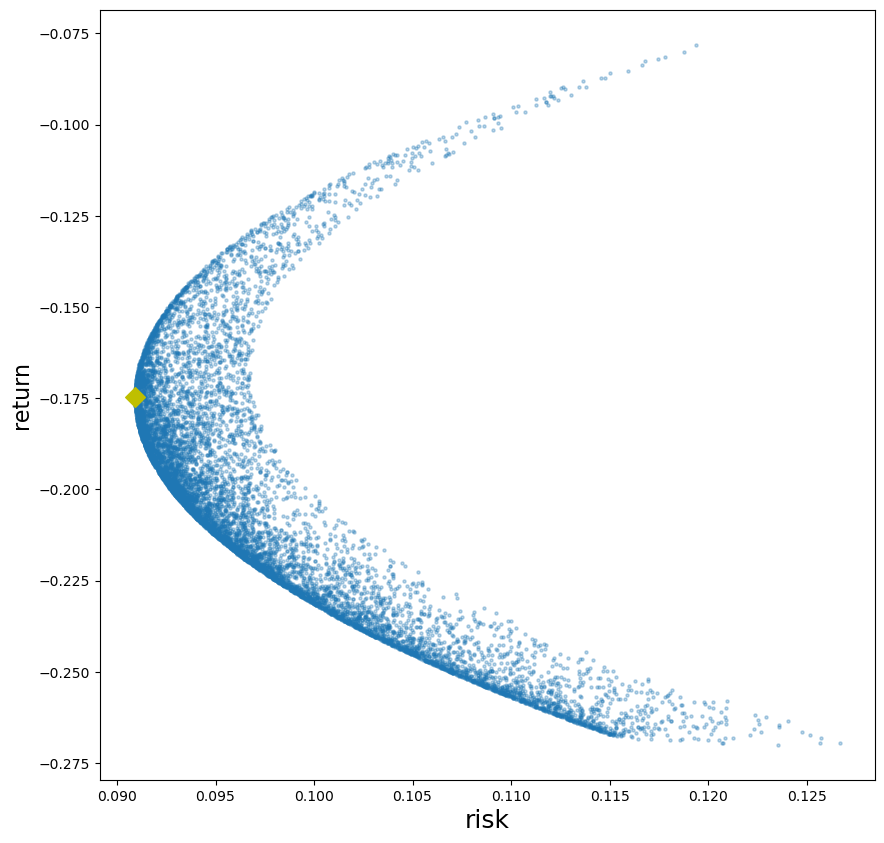

In [62]:
min_var_ret = portfolios.loc[portfolios['risk'].idxmin(), 'ret']
min_var_risk = portfolios.loc[portfolios['risk'].idxmin(), 'risk']

import matplotlib.pyplot as plt
plt.subplots(figsize=[10,10])
plt.xlabel('risk', fontsize=18)  # Corrected 'xlable' to 'xlabel'
plt.ylabel('return', fontsize=16)  # Corrected 'ylable' to 'ylabel'
plt.scatter(portfolios['risk'], portfolios['ret'], marker='o', s=5, alpha=0.3)  # Corrected '0' to 'o'
plt.scatter(min_var_risk, min_var_ret, color='y', marker='D', s=100)  # Corrected 'market' to 'marker'
plt.show()

# Efficient frontier with no short-selling capability and no riskless lending and borrowing opportunity

Now, Let's construct the efficient frontier with short-selling constraint and no risk-free lending and borrowing.     

1. So our goal is to find the efficient frontier. The first step is to find the minimum-variance portfolio，which you have already found the portfolio in previous section 

2. The next step is to solve the portfolio optimization problem for specified values of targeted portfolio return:
$$ \min \sigma^{2}_{P}=\mathbf{w\Sigma w'} $$
$$ E(R_{P})=R_{P}^{0} $$
$$ \mathbf{w1^{'}}=1 $$
$$ \mathbf{w}>0 $$

3. Again, we can solve this optimization problem using the 'minimize' function for every given portfolio return. You need to specify values for $R_{i} $, which is the targeted portfolio return. But what values can we give? The values should be between the portfolio return of minimum-variance of portfolio (that you already computed) and also the maximum portfolio return from simulation. We can artificially create 100 risk levels in this range as $R_{i}, i\in (1, 100) $.


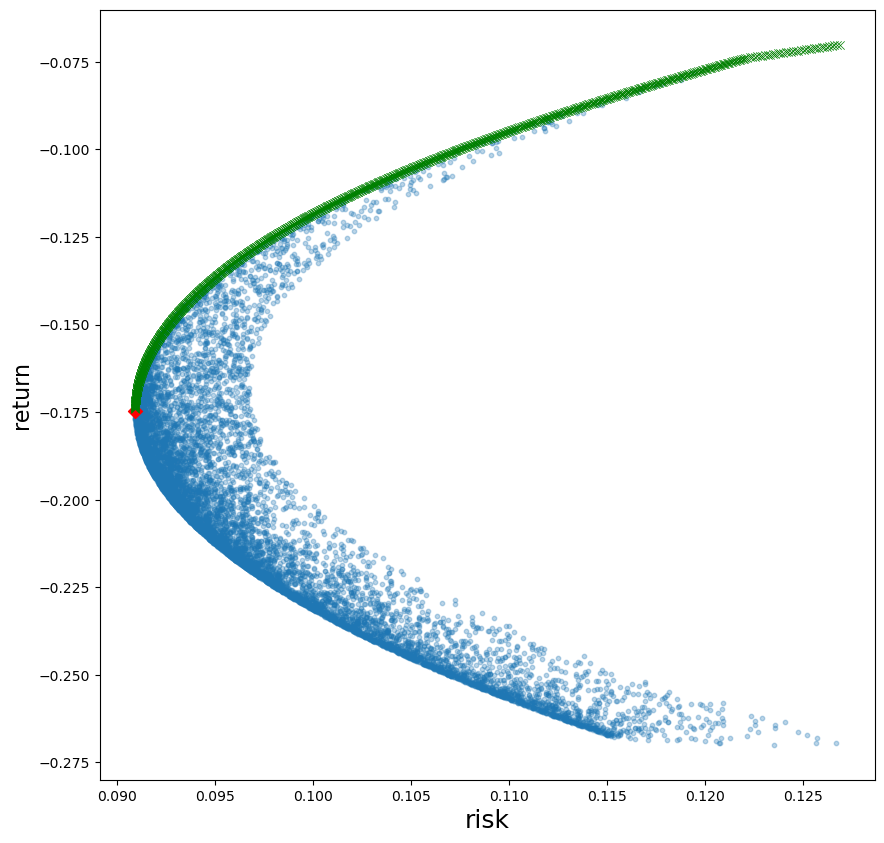

In [63]:
#first we generate the "grids" over portfolio returns:
#we want to calculate the minimum variance for all the point on the grids of portfolio returns:

#min_var_ret = np.array(min_var_ret) #Maybe necessary depends on what type of this variable is when you created it 

#eff_ret = np.arange(min_var_ret, portfolios.ret.max(), 
#                  (portfolios.ret.max()-min_var_ret)/100)
eff_ret = np.arange(-0.174, -0.07, (-0.07+0.174)/1000)
eff_risk = np.zeros(len(eff_ret))


#then we can use the minimize function over each point on "eff_risk":
#e = 1e-10 #we create a very small positive real number here
cov_mat = np.array(cov_mat)
f = lambda x: x@cov_mat@x.T
x0 = np.array((1, 1, 1)) #set the initial value of x, y, z

for ind in range(len(eff_ret)):
    
    #set the optimization problem constraints:
    cons = ({'type':'eq','fun':lambda x:x[0] + x[1] + x[2] - 1},  #constraint：x+y+z = 1
        {'type':'eq','fun':lambda x:x@asset_ret - eff_ret[ind]},    #constraint: set the return of the portfolio to be constant
        {'type':'ineq','fun':lambda x:x[0] },                  #constraint: x,y,z > 0
        {'type':'ineq','fun':lambda x:x[1] },
        {'type':'ineq','fun':lambda x:x[2] })
    
    #find the minimum variance of the portfolio given certain return level
    res = minimize(f, x0, constraints=cons)
    eff_risk[ind] = res.fun
    #print(eff_y)

    
#now the eff_x and eff_y describe the risk and return combination on the efficient frontier.
#let's plot the efficient frontier:

plt.subplots(figsize=[10,10])
plt.xlabel('risk', fontsize=18)
plt.ylabel('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'],marker='o', s=10, alpha=0.3)
plt.scatter(min_var_risk, min_var_ret, color='r', marker='D', s=50)
plt.scatter(eff_risk, eff_ret, color='g', marker='x', linestyle='-', linewidth=0.5)

4. Alternatively, we can use the Monte Carlo method again here to find the efficient frontier. The problem is equivilent to a maximization problem:

$$ \max E(R_{P}) = \mathbf{wE(R)}$$
$$ \sigma^{2}_{P} = \sigma^{2}_{i}$$
$$ \mathbf{w1^{'}}=1 $$
$$ \mathbf{w}>0 $$

5. You need to specify values for $ \sigma^{2}_{i} $, which is the targeted portfolio risk. But what values can we give? The values should be between the portfolio risk of minimum-variance of portfolio (that you already computed) and also the maximum portfolio risk from simulation. We can artificially create 100 risk levels in this range as $ \sigma^{2}_{i}, i\in (1, 100) $.

6. For each value of  $ \sigma^{2}_{i} $, you need to find what is the highest return for the simulated portfolio with the risk level not higher than $\sigma^{2}_{i}$. After this you will have a combination of different risk levels and under which the best return you can get. Plot these combinations on the previous graph to show the efficient frontier.

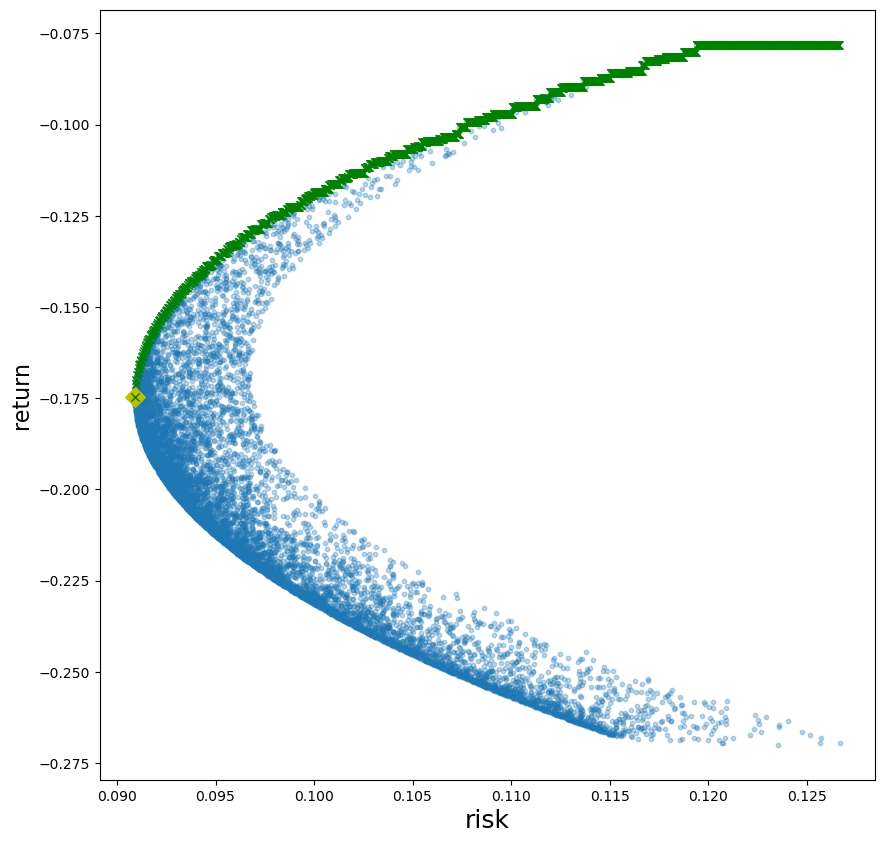

In [64]:
#We want to find the 'efficient' portfolios in our 10,000 random simulations
#Those portfolios will resemble the efficient frontier

#first we want to create a list of certain risk levels
#then we want to check give this risk level, what is the best portfolio return we get from simulation

eff_x = np.arange(portfolios.risk.min(), portfolios.risk.max(), 
                  (portfolios.risk.max()-portfolios.risk.min())/1000)
eff_y = np.zeros(len(eff_x))
#print(portfolios)

for ind in range(len(eff_x)):
    
    #find the highest return of the portfolio given certain risk level
    eff_y[ind-1] = portfolios.loc[portfolios.risk <= eff_x[ind-1], 'ret'].max()

    #print(eff_y)

    
#plot the efficient frontier on the previous graph
plt.subplots(figsize=[10,10])
plt.xlabel('risk', fontsize=18)
plt.ylabel('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'],marker='o', s=10, alpha=0.3)
plt.scatter(min_var_risk, min_var_ret, color='y', marker='D', s=100)
plt.scatter(eff_x, eff_y, color='g', marker='x', linestyle='-', linewidth=1)

# Short-selling is allowed (more realistic)

Now, Let's construct the efficient frontier with short-selling and no risk-free lending and borrowing.     

1. We want to find the efficient frontier with short-selling. First, Let's look at the problem:

$$ \min \sigma^{2}_{P}=\mathbf{w\Sigma w'} $$
$$ E(R_{P})=R_{P}^{0} $$
$$ \mathbf{w1^{'}}=1 $$

2. So, now, there is no limit on the weights. They can be anything but we cant spend more than what we have, and that's why we still have $ \mathbf{w1^{'}}=1 $. 

3. Our goal is the same as before: Use either optimization problem solver, or using Monte Carlo simulation, but without non-negative constraint. Draw the efficient frontier with a scatter plot.

In [66]:
#Generate a large amount of random weights for first three assets, i.e., 10000 weights
#normalize them so that sum of all weights equals one

#The random seed at the top of the code is making sure that 
#I get the same random numbers every time for reproducibility.
np.random.seed(42)

weight = np.random.normal(size=(10000, 2))
weight = pd.DataFrame(weight)
weight.columns = ['w1', 'w2']
weight['w3'] = 1 - weight['w1'] - weight['w2'] 


#calculate the portfolio risk and returns
asset_ret = np.array(sum_stats.loc['APPLE':'MSOFT', 'Mean'])
port_ret = weight.dot(asset_ret)

cov_mat = np.array(cov_mat)
weight = np.array(weight)

port_std = (np.diag(weight@cov_mat@weight.T))
#print(port_std)

portfolios = pd.DataFrame({'ret':port_ret, 'risk':port_std})
weight = pd.DataFrame(weight)
weight.columns = ['weight1', 'weight2', 'weight3']
portfolios = portfolios.join(weight)

portfolios.head()

,ret,risk,weight1,weight2,weight3
0,-0.293668,0.131507,0.496714,-0.138264,0.641550
1,0.021583,0.272480,0.647689,1.523030,-1.170718
2,-0.307312,0.178308,-0.234153,-0.234137,1.468290
3,-0.128101,0.216620,1.579213,0.767435,-1.346648
4,-0.157998,0.106122,-0.469474,0.542560,0.926914


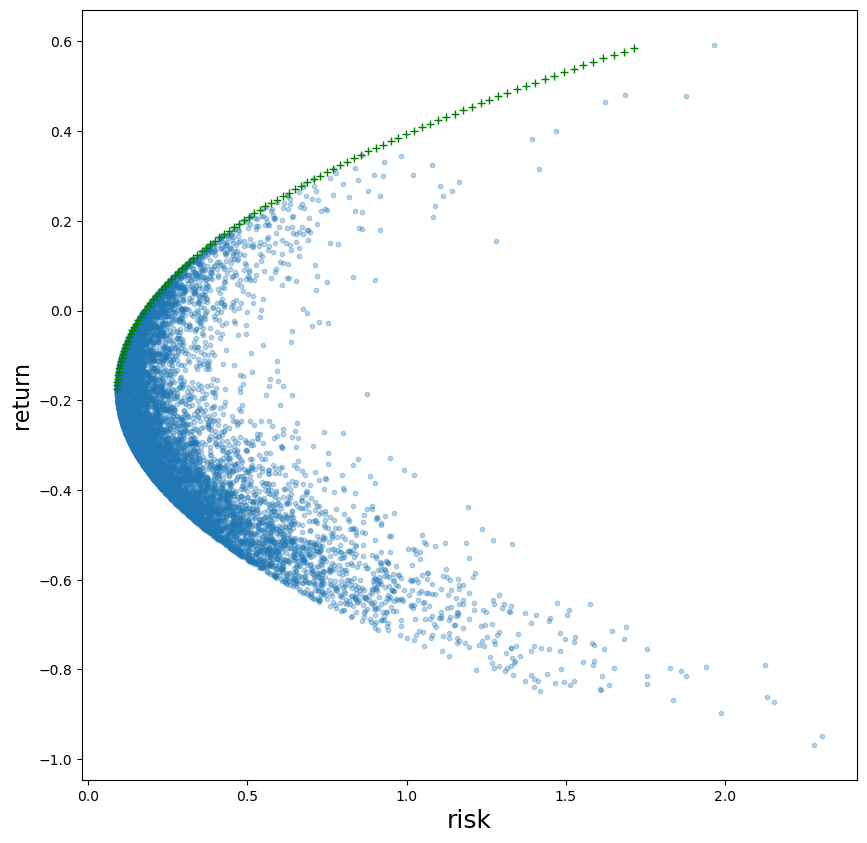

In [67]:
min_var_ret = portfolios.ret.iloc[portfolios.risk.idxmin()]
eff_ret = np.arange(min_var_ret, portfolios.ret.max(),
                    (portfolios.ret.max()-min_var_ret)/100)
eff_risk = np.zeros(len(eff_ret))

cov_mat = np.array(cov_mat)
f = lambda x: x@cov_mat@x.T
x0 = np.array((0, 0, 0,))

for ind in range(len(eff_ret)):
    cons = ({'type':'eq','fun':lambda x:x[0]+x[1]+x[2]-1},
            {'type':'eq','fun':lambda x:x@asset_ret - eff_ret[ind]})
    res = minimize(f, x0, constraints=cons)
    eff_risk[ind] = res.fun

plt.subplots(figsize=[10,10])
plt.xlabel('risk', fontsize=18)
plt.ylabel('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'], marker='o', s=10, alpha=0.3)
plt.scatter(eff_risk, eff_ret, color='g', marker='+', linestyle='-', linewidth=1)

# Short-selling with riskless lending and borrowing

Now, Let's construct the efficient frontier with short-selling and also with the risk-free lending and borrowing.

1. In this case, we should first find the tangency portfolio and then draw the line from the risk-free asset to the tangency portfolio. That's it. In this case, suppose the risk free rate is -0.00001 (daily return, or about $-0.252\%$ annually).

2. Let's first find the tangency portfolio, which has the largest slope $\theta$. We need to solve the following:

$$ \max \theta = \frac{E(R_{P})-R_{F}}{\sigma_{P}}$$
$$ \mathbf{w1^{'}}=1 $$

3. Use solver or simply find the the $\theta$ that offers the best sharpe ratio.

5. Next step, is to draw the line. Consider the following formula: $$ R_{P} = R_{F} + \frac{E(R_{T}-R_{F})}{\sigma_{T}}\sigma_{P} = R_{F} + \theta\sigma_{P} $$ You already found the tangency portfolio and you have the \textit{theta}. The only step that you need to take is to generate different levels of portfolio standard deviation (starting from 0 to some level that you find appropriate) and compute the portfolio return using the above formula. 

6. Draw the efficient frontier with a scatter plot.

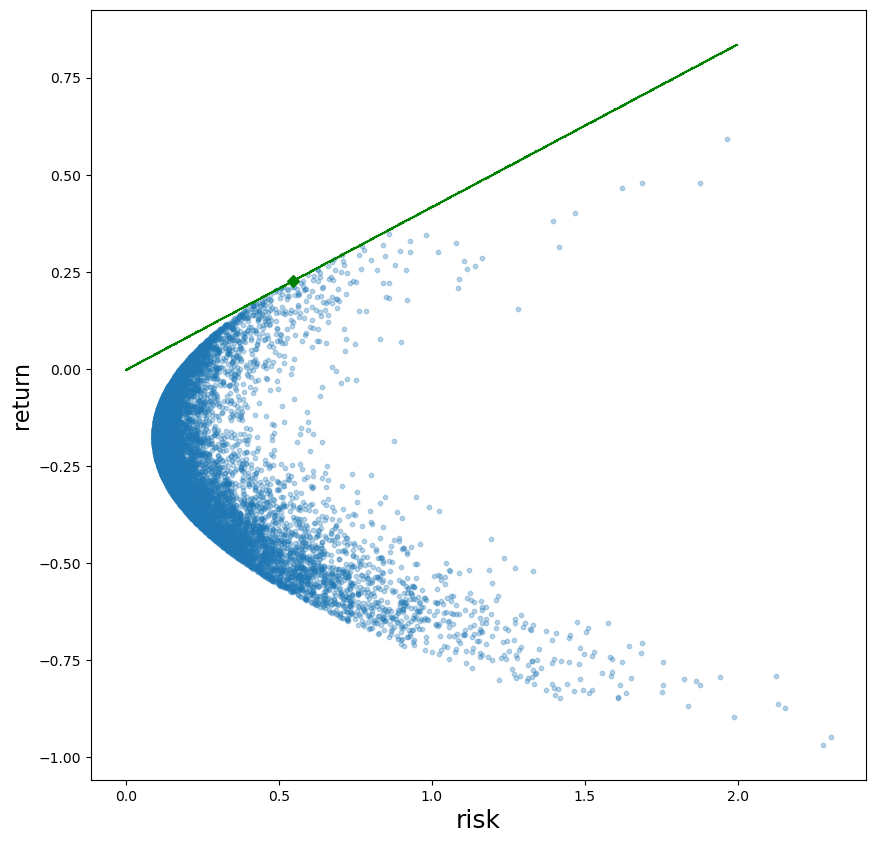

In [68]:
rf = -0.00001*252
portfolios['sr'] = (portfolios['ret'] - rf)/portfolios['risk']


max_sr = portfolios[['sr']].max().to_numpy();
tp_ret = portfolios.loc[portfolios[['sr']].idxmax(), 'ret']
tp_risk = portfolios.loc[portfolios[['sr']].idxmax(), 'risk']

cml_x = np.arange(0, 2, 2/1000)
cml_y = rf + cml_x*max_sr

plt.subplots(figsize=[10,10])
plt.xlabel('risk', fontsize=18)
plt.ylabel('return', fontsize=16)
plt.scatter(portfolios['risk'], portfolios['ret'], marker='o', s=10, alpha=0.3)
plt.scatter(tp_risk, tp_ret, color='g', marker='D')
plt.scatter(cml_x, cml_y, color='g', marker='+', s=3)

# End